# Heston's Pricing model

The black scholes model assumes constant volatility of the underlying asset price. Heston's model improves on it by introducing **stochastic volatility**
$\\
dS_t = r{S_t}dt + \sqrt{v_t}{S_t}dW^s_t
\\
dv_t = k(\theta - v_t)dt + \sigma\sqrt{v_t}dW^v_t
$
where </br>
${S_t}$ = current price of the underlying asset </br>
**$r$** = risk-free interest rate </br>
**$v_t$** = instantaneous variance of the underlying asset,  </br>
**$\theta$** = long-run average variance </br>
k = reversion rate of variance to $\theta$ </br>
**$\sigma$** = volatility of volatility (vol-of-vol) </br>
**$W^s_t$** = the brownian motion related to the underlying asset</br>
**$W^v_t$** = the brownian motion related to the variance of the underlying asset</br>
The Brownian motions have a correaltion $\rho$ 

The variance is modelled on the Cox-Ingresell-Ross(CIR) process. 
We will use monte carlo simulatioin to simulate the stock prices and variance. Then we will calculate the stock option(call) prices. 
Now to generate a pair of standard normal random variables(for the Brownian motions) with fixed correlation, we will use Cholesky Decompostion. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The algorithm is as follows

1. Declare 2 arrays for storing stock prices and variances.
2. Correlation matrix R for $\rho$.
3. Initialize Z1 and Z2, both are standard normal random variables. 
4. Use Cholesky decomposition on R to generate matrix L, which gives the final standard random normal variables $X1 = L[0,0]*Z1$ and $X2= L[1,0]*Z1 + L[1,1]*Z2$
5. Calculate $S_i$'s and $v_i$'s (after discretizng $dS_t$ and $dv_t$).
6. Final call price will be given by-

$$
C = [\frac{1}{M}\sum_{i=1}^{M}(S_i - K)^{+}]e^{-rT}
$$
where M is the number of simualtions, $S_i$ is the final price of the stock for the ith simulation, K is the Strike price, T is the expiration time.


Applying Euler discretization we get the following:

$S_{t+dt} = {S_t}exp( (r-\frac{1}{2}v_t)dt + \sqrt{v_t dt}Z_s)$</br>
$v_{t+dt} = v_t + k(\theta - v_t)dt + \sigma\sqrt{v_t dt}Z_v$

In [2]:
#function to simulate stock prices using the Heston model

def heston_model_sim(S0,r,v0,k,theta,sigma,rho,T,N,M):
    
    
    dt = T/N
    
    np.random.seed(0)
    
    S = np.zeros((M,N+1))
    v = np.zeros((M,N+1))
    
    S[:,0] = S0
    v[:,0] = v0
    
    Z1 = np.random.standard_normal((M,N+1))
    Z2 = np.random.standard_normal((M,N+1))
    
    R = np.array([[1,rho],[rho,1]])
    L = np.linalg.cholesky(R)
    
    for i in range(M):
        
        for j in range(N):
            
#             Z1 = np.random.standard_normal(N+1)
#             Z2 = np.random.standard_normal(N+1)
    
            X1 = L[0,0]*Z1[i,j] #for the W^s
            X2 = L[1,0]*Z1[i,j] + L[1,1]*Z2[i,j]# for W^v
            
            S[i,j+1] = S[i,j]*np.exp((r-0.5*v[i,j])*dt + np.sqrt(v[i,j]*dt)*X1)
            v[i,j+1] = max(v[i,j] + k*(theta-v[i,j])*dt + sigma*np.sqrt(v[i,j]*dt)*X2,0)
            
            #v[i,j+1] = max(v[i,j] + k*(theta-v[i,j])*dt + sigma*np.sqrt(v[i,j]*dt)*W_v[j],0)
            #S[i,j+1] = S[i,j]*np.exp((r-0.5*v[i,j])*dt + np.sqrt(v[i,j]*dt)*W_s[j])
                                     
    return S,v


In [3]:
S0 = 100
r = 0.08
v0 = 0.25**2
k = 1.6
theta = 0.20**2
sigma = 0.4
rho = 0.75
T = 1
N = 252
M = 100000

In [4]:
S,v = heston_model_sim(S0,r,v0,k,theta,sigma,rho,T,N,M)

In [5]:
print(S.shape)

(100000, 253)


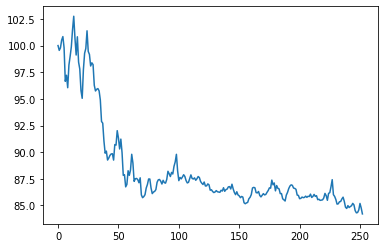

In [7]:
plt.plot(S[243,:])

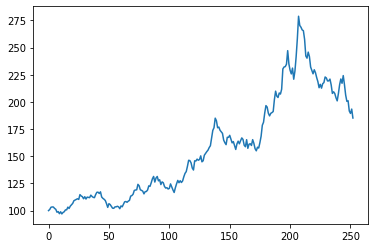

In [17]:
plt.plot(S[2500,:])

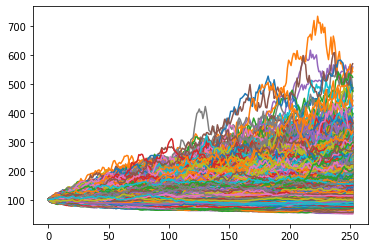

In [9]:
for i in range(S.shape[0]):
    
    plt.plot(S[i,:])

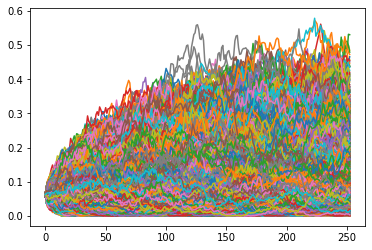

In [10]:
for i in range(v.shape[0]):
    plt.plot(v[i,:])

In [16]:
#final call option price
K = 105
C = []
for i in range(S.shape[0]):
    
    cp = max(S[i,252]-K,0)
    
    C.append(cp)
payoff = sum(C)/S.shape[0]

final_payoff = payoff*np.exp(-r*T)

print(final_payoff)


9.993359435785253
